In [385]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import math
import io
import base64

Importar os elementos e Ka e Kb

In [386]:
filename = 'elementos-ondas.txt'

# Ler o arquivo
with open(filename, 'r') as file:
    data = file.readlines()

parsed_data = [line.split() for line in data]

elements = []
ka = []
kb = []

for line in parsed_data:
    # Verificar se a linha tem pelo menos 3 colunas (índice, elemento, valor 1)
    if len(line) >= 3:
        elements.append(line[1])
        ka.append(float(line[2]))
        if len(line) > 3:
            kb.append(float(line[3]))
        else:
            kb.append(np.nan)  # Caso onde não há segundo valor

# Converter listas em arrays NumPy
elements_array = np.array(elements)
ka_array = np.array(ka)
kb_array = np.array(kb)


In [387]:
#Carregando dados do Ti-U
dadosTi = np.loadtxt("Ti-U.txt")
#pontos 10 a 90 com step 0.1
array = np.arange(10.00, 10.00 + 801 * 0.1, 0.1)[:801]
#Carregando dados de K,Ca,Sn-Cs
dadosKCaSn = np.loadtxt("KCaSn-Cs.txt")
array2 = np.arange(90.00, 90.00 + 501*0.1,0.1)[:501]
#Carregando dados para Cl
dadosCl = np.loadtxt("Cl.txt")
array3 = np.arange(90.00, 90.00 + 61*0.1,0.1)[:61]
#Carregando S
dadosS = np.loadtxt("S.txt")
array4 = np.arange(108.00, 108.00 + 61*0.1,0.1)[:61]
#carregando P
dadosP = np.loadtxt("P.txt")
array5 = np.arange(138.00, 138.00 + 61*0.1, 0.1)[:61]
# Carregando dados para Si
dadosSi = np.loadtxt("Si.txt")
array6 = np.arange(106.00, 106.00 + 61*0.1, 0.1)[:61]
# Carregando dados para Al
dadosAl = np.loadtxt("Al.txt")
array7 = np.arange(142.00, 142.00 + 61*0.1, 0.1)[:61]
# Carregando dados para Mg
dadosMg = np.loadtxt("Mg.txt")
array8 = np.arange(42.00, 42.00 + 61*0.1, 0.1)[:61]
# Carregando dados para Na
dadosNa = np.loadtxt("Na.txt")
array9 = np.arange(52.00, 52.00 + 61*0.1, 0.1)[:61]
# Carregando dados para F
dadosF = np.loadtxt("F.txt")
array10 = np.arange(88.00, 88.00 + 61*0.1, 0.1)[:61]
# Carregando dados para O
dadosO = np.loadtxt("O.txt")
array11 = np.arange(130.00, 130.00 + 61*0.1, 0.1)[:61]

Com base na lei de Bragg podemos obter o comprimento de onda conforme a
radiação emitida:
nλ = 2d.senθ
onde n = 1
2d = 4.028 para Ti-U, K,Ca,Sn-Cs
2d = 6,53 para Cl, S, P
2d = 8,742 para Si, Al
2d = 25,75 para Mg,Na, F, O

O calculo é feito em todos os pontos e armezandos em um array.

In [388]:
kTi = np.array([])
for i in range(len(array)):
    kTi = np.append(kTi, (4.028*math.sin((array[i]*math.pi/180)/2)))
    
k2 = np.array([])
for i in range(len(array2)):
    k2 = np.append(k2,(4.028*math.sin((array2[i]*math.pi/180)/2)))
    
k3 = np.array([])
for i in range(len(array3)):
    k3 = np.append(k3,(6.53*math.sin((array3[i]*math.pi/180)/2)))
    
k4 = np.array([])
for i in range(len(array4)):
    k4 = np.append(k4,(6.53*math.sin((array4[i]*math.pi/180)/2)))
    
k5 = np.array([])
for i in range(len(array5)):
    k5 = np.append(k5, (6.53 * math.sin((array5[i] * math.pi / 180) / 2)))
    
k6 = np.array([])
for i in range(len(array6)):
    k6 = np.append(k6, (8.742 * math.sin((array6[i] * math.pi / 180) / 2)))

k7 = np.array([])
for i in range(len(array7)):
    k7 = np.append(k7, (8.742 * math.sin((array7[i] * math.pi / 180) / 2)))

k8 = np.array([])
for i in range(len(array8)):
    k8 = np.append(k8, (25.75 * math.sin((array8[i] * math.pi / 180) / 2)))

k9 = np.array([])
for i in range(len(array9)):
    k9 = np.append(k9, (25.75 * math.sin((array9[i] * math.pi / 180) / 2)))

k10 = np.array([])
for i in range(len(array10)):
    k10 = np.append(k10, (25.75 * math.sin((array10[i] * math.pi / 180) / 2)))

k11 = np.array([])
for i in range(len(array11)):
    k11 = np.append(k11, (25.75 * math.sin((array11[i] * math.pi / 180) / 2)))

Verifica se o comprimento de onda é próximo a valor tabelado de algum elemento de ka e kb

In [389]:

def encontrarK(kdados, dados, k_array, pontos):
    possiveis_picos_K = []
    for i, valor in enumerate(kdados):
        for j, valor_ka in enumerate(k_array):
            if np.isclose(valor, valor_ka, atol=0.04):
                possiveis_picos_K.append((valor, round(pontos[i],2), elements_array[j], dados[i]))
                break  # Interrompe o loop interno quando um valor de ka_array próximo é encontrado
    return possiveis_picos_K


Função para atribuir o possivel valor de ka e kb apenas para o maior valor dentro dos possiveis, ou seja, ao POSSIVEL pico.
Função para encontrar o indice a ser usado dentro da função que faz um filtro melhor sobre um possivel pico, verificando se é o maior valor entre os pontos ao seu redor. 
Essa função filtra melhor os possiveis picos, mas ainda é necessario melhor avaliação, pois ainda continua uma analise muito generica.

In [390]:
def filtrar_picos(possiveis_picos):
    max_dadosTi = {}
    for valor, array_val, elements_array_val, dadosTi_val in possiveis_picos:
        if (elements_array_val not in max_dadosTi) or (dadosTi_val > max_dadosTi[elements_array_val][3]):
            max_dadosTi[elements_array_val] = (valor, array_val, elements_array_val, dadosTi_val)
    return np.array(list(max_dadosTi.values()))

def encontrarI(valor_ponto, total_pontos, valor_min, valor_max):
    return ((valor_ponto - valor_min) / (valor_max - valor_min) * (total_pontos - 1))

def verificar_picos(picos, dados, total, valor_minimo, valor_maximo):
    picos_reais = []
    for i in range(len(picos)):
        pico = float(picos[i, 3])
        pico_posicao = float(picos[i, 1])
        elemento = picos[i, 2]
        j = int(encontrarI(pico_posicao, total, valor_minimo, valor_maximo)) 
        if pico == dados[j-1]:
            j = j -1
        if pico == dados[j+1]:
            j = j+1
        #dados_numerico = [float(x) for x in dados[max(j - 1, 0):min(j + 2, len(dados))]]
        #print(pico, j, pico_posicao, dados[j])
        if (pico > dados[j-1]) and (pico > dados[j+1]):
            picos_reais.append((pico, pico_posicao, elemento))
           # print(pico)
    return picos_reais



In [391]:
#ordens de uso das funções
#Valores da analise de Ti-U
possiveis_picos_Ka = encontrarK(kTi,dadosTi, ka_array, array)
possiveis_picos_Kb = encontrarK(kTi,dadosTi, kb_array, array)
possiveis_picos_Ka = filtrar_picos(possiveis_picos_Ka)
possiveis_picos_Kb = filtrar_picos(possiveis_picos_Kb)
picosKa = np.array(verificar_picos(possiveis_picos_Ka, dadosTi, len(dadosTi), 10.0, 90.0))
picosKb = np.array(verificar_picos(possiveis_picos_Kb, dadosTi, len(dadosTi), 10.0, 90.0))
np.savetxt('picosKaTi-U', picosKa, delimiter=',', fmt='%s')
np.savetxt('picosKbTi-U', picosKb,delimiter=',', fmt='%s' )
#Valores K,Ca,Sn-Cs
possiveis_picos_Ka2 = encontrarK(k2,dadosKCaSn, ka_array, array2)
possiveis_picos_Kb2 = encontrarK(k2,dadosKCaSn, kb_array, array2)
possiveis_picos_Ka2 = filtrar_picos(possiveis_picos_Ka2)
possiveis_picos_Kb2 = filtrar_picos(possiveis_picos_Kb2)
picosKa2 = np.array(verificar_picos(possiveis_picos_Ka2, dadosKCaSn, len(dadosKCaSn), 90.0, 140.0))
picosKb2 = np.array(verificar_picos(possiveis_picos_Kb2, dadosKCaSn, len(dadosKCaSn), 90.0, 140.0))
np.savetxt('picosKaKCaSn-Cs', picosKa2, delimiter=',', fmt='%s')
np.savetxt('picosKbKCaSn-Cs', picosKb2,delimiter=',', fmt='%s' )
#Valores Cl
possiveis_picos_Cl_Ka = encontrarK(k3, dadosCl, ka_array, array3)
possiveis_picos_Cl_Kb = encontrarK(k3, dadosCl, kb_array, array3)
possiveis_picos_Cl_Ka = filtrar_picos(possiveis_picos_Cl_Ka)
possiveis_picos_Cl_Kb = filtrar_picos(possiveis_picos_Cl_Kb)
picosCl_Ka = np.array(verificar_picos(possiveis_picos_Cl_Ka, dadosCl, len(dadosCl), 90.0, 96.00))
picosCl_Kb = np.array(verificar_picos(possiveis_picos_Cl_Kb, dadosCl, len(dadosCl), 90.0, 96.00))
np.savetxt('picosKaCl', picosCl_Ka, delimiter=',', fmt='%s')
np.savetxt('picosKbCl', picosCl_Kb,delimiter=',', fmt='%s' )

# Valores S
possiveis_picos_S_Ka = encontrarK(k4, dadosS, ka_array, array4)
possiveis_picos_S_Kb = encontrarK(k4, dadosS, kb_array, array4)
possiveis_picos_S_Ka = filtrar_picos(possiveis_picos_S_Ka)
possiveis_picos_S_Kb = filtrar_picos(possiveis_picos_S_Kb)
picosS_Ka = np.array(verificar_picos(possiveis_picos_S_Ka, dadosS, len(dadosS), 108.0, 114.0))
picosS_Kb = np.array(verificar_picos(possiveis_picos_S_Kb, dadosS, len(dadosS), 108.0, 114.0))
np.savetxt('picosKaS.csv', picosS_Ka, delimiter=',', fmt='%s')
np.savetxt('picosKbS.csv', picosS_Kb, delimiter=',', fmt='%s')

# Valores P
possiveis_picos_P_Ka = encontrarK(k5, dadosP, ka_array, array5)
possiveis_picos_P_Kb = encontrarK(k5, dadosP, kb_array, array5)
possiveis_picos_P_Ka = filtrar_picos(possiveis_picos_P_Ka)
possiveis_picos_P_Kb = filtrar_picos(possiveis_picos_P_Kb)
picosP_Ka = np.array(verificar_picos(possiveis_picos_P_Ka, dadosP, len(dadosP), 138.0, 144.0))
picosP_Kb = np.array(verificar_picos(possiveis_picos_P_Kb, dadosP, len(dadosP), 138.0, 144.0))
np.savetxt('picosKaP.csv', picosP_Ka, delimiter=',', fmt='%s')
np.savetxt('picosKbP.csv', picosP_Kb, delimiter=',', fmt='%s')

# Valores Si
possiveis_picos_Si_Ka = encontrarK(k6, dadosSi, ka_array, array6)
print(possiveis_picos_Si_Ka)
possiveis_picos_Si_Kb = encontrarK(k6, dadosSi, kb_array, array6)
possiveis_picos_Si_Ka = filtrar_picos(possiveis_picos_Si_Ka)
print(possiveis_picos_Si_Ka)
possiveis_picos_Si_Kb = filtrar_picos(possiveis_picos_Si_Kb)
picosSi_Ka = np.array(verificar_picos(possiveis_picos_Si_Ka, dadosSi, len(dadosSi), 106.0, 112.0))
picosSi_Kb = np.array(verificar_picos(possiveis_picos_Si_Kb, dadosSi, len(dadosSi), 106.0, 112.0))
np.savetxt('picosKaSi.csv', picosSi_Ka, delimiter=',', fmt='%s')
np.savetxt('picosKbSi.csv', picosSi_Kb, delimiter=',', fmt='%s')

# Valores Al
possiveis_picos_Al_Ka = encontrarK(k7, dadosAl, ka_array, array7)
possiveis_picos_Al_Kb = encontrarK(k7, dadosAl, kb_array, array7)
possiveis_picos_Al_Ka = filtrar_picos(possiveis_picos_Al_Ka)
possiveis_picos_Al_Kb = filtrar_picos(possiveis_picos_Al_Kb)
picosAl_Ka = np.array(verificar_picos(possiveis_picos_Al_Ka, dadosAl, len(dadosAl), 142.0, 148.0))
picosAl_Kb = np.array(verificar_picos(possiveis_picos_Al_Kb, dadosAl, len(dadosAl), 142.0, 148.0))
np.savetxt('picosKaAl.csv', picosAl_Ka, delimiter=',', fmt='%s')
np.savetxt('picosKbAl.csv', picosAl_Kb, delimiter=',', fmt='%s')

# Valores Mg
possiveis_picos_Mg_Ka = encontrarK(k8, dadosMg, ka_array, array8)
possiveis_picos_Mg_Kb = encontrarK(k8, dadosMg, kb_array, array8)
possiveis_picos_Mg_Ka = filtrar_picos(possiveis_picos_Mg_Ka)
possiveis_picos_Mg_Kb = filtrar_picos(possiveis_picos_Mg_Kb)
picosMg_Ka = np.array(verificar_picos(possiveis_picos_Mg_Ka, dadosMg, len(dadosMg), 42.0, 48.0))
picosMg_Kb = np.array(verificar_picos(possiveis_picos_Mg_Kb, dadosMg, len(dadosMg), 42.0, 48.0))
np.savetxt('picosKaMg.csv', picosMg_Ka, delimiter=',', fmt='%s')
np.savetxt('picosKbMg.csv', picosMg_Kb, delimiter=',', fmt='%s')

# Valores Na
possiveis_picos_Na_Ka = encontrarK(k9, dadosNa, ka_array, array9)
possiveis_picos_Na_Kb = encontrarK(k9, dadosNa, kb_array, array9)
possiveis_picos_Na_Ka = filtrar_picos(possiveis_picos_Na_Ka)
possiveis_picos_Na_Kb = filtrar_picos(possiveis_picos_Na_Kb)
picosNa_Ka = np.array(verificar_picos(possiveis_picos_Na_Ka, dadosNa, len(dadosNa), 52.0, 58.0))
picosNa_Kb = np.array(verificar_picos(possiveis_picos_Na_Kb, dadosNa, len(dadosNa), 52.0, 58.0))
np.savetxt('picosKaN.csv', picosNa_Ka, delimiter=',', fmt='%s')
np.savetxt('picosKbN.csv', picosNa_Kb, delimiter=',', fmt='%s')

# Valores F
possiveis_picos_F_Ka = encontrarK(k10, dadosF, ka_array, array10)
possiveis_picos_F_Kb = encontrarK(k10, dadosF, kb_array, array10)
possiveis_picos_F_Ka = filtrar_picos(possiveis_picos_F_Ka)
possiveis_picos_F_Kb = filtrar_picos(possiveis_picos_F_Kb)
picosF_Ka = np.array(verificar_picos(possiveis_picos_F_Ka, dadosF, len(dadosF), 88.0, 94.0))
picosF_Kb = np.array(verificar_picos(possiveis_picos_F_Kb, dadosF, len(dadosF), 88.0, 94.0))
np.savetxt('picosKaF.csv', picosF_Ka, delimiter=',', fmt='%s')
np.savetxt('picosKbF.csv', picosF_Kb, delimiter=',', fmt='%s')

# Valores O
possiveis_picos_O_Ka = encontrarK(k11, dadosO, ka_array, array11)
possiveis_picos_O_Kb = encontrarK(k11, dadosO, kb_array, array11)
possiveis_picos_O_Ka = filtrar_picos(possiveis_picos_O_Ka)
possiveis_picos_O_Kb = filtrar_picos(possiveis_picos_O_Kb)
picosO_Ka = np.array(verificar_picos(possiveis_picos_O_Ka, dadosO, len(dadosO), 130.0,136.0))
picosO_Kb = np.array(verificar_picos(possiveis_picos_O_Kb, dadosO, len(dadosO), 130.0, 136.0))
np.savetxt('picosKaO.csv', picosO_Ka, delimiter=',', fmt='%s')
np.savetxt('picosKbO.csv', picosO_Kb, delimiter=',', fmt='%s')



[(7.090319905604689, 108.4, 'Si', 420.84), (7.094779750338131, 108.5, 'Si', 548.48), (7.099234192088163, 108.6, 'Si', 672.12), (7.103683227462534, 108.7, 'Si', 750.2), (7.1081268530731085, 108.8, 'Si', 803.7), (7.112565065535874, 108.9, 'Si', 796.87), (7.116997861470936, 109.0, 'Si', 728.67), (7.121425237502529, 109.1, 'Si', 619.98), (7.125847190259014, 109.2, 'Si', 512.85), (7.13026371637288, 109.3, 'Si', 419.75), (7.134674812480753, 109.4, 'Si', 325.81), (7.139080475223389, 109.5, 'Si', 244.71), (7.143480701245684, 109.6, 'Si', 197.94), (7.147875487196678, 109.7, 'Si', 149.49), (7.152264829729545, 109.8, 'Si', 112.23), (7.156648725501615, 109.9, 'Si', 84.25), (7.161027171174357, 110.0, 'Si', 63.92), (7.165400163413396, 110.1, 'Si', 47.25)]
[['7.1081268530731085' '108.8' 'Si' '803.7']]


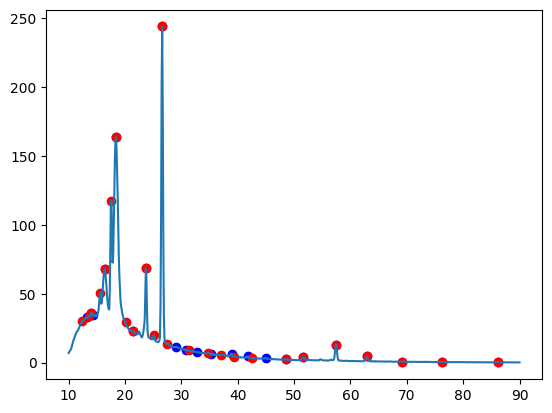

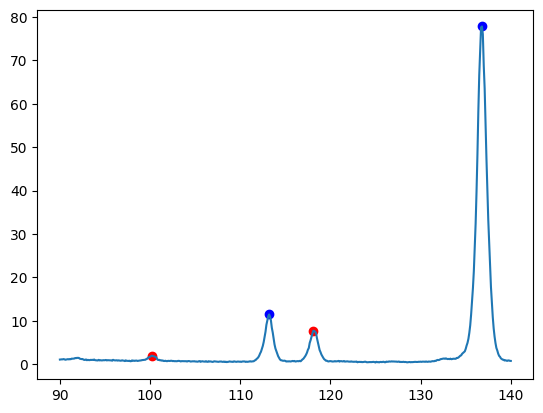

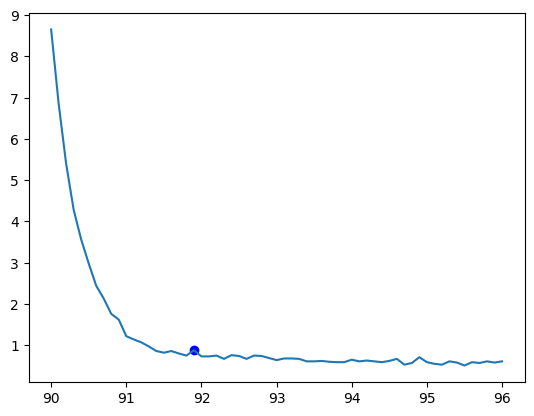

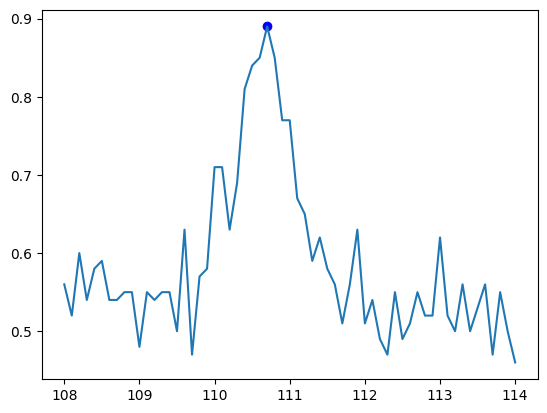

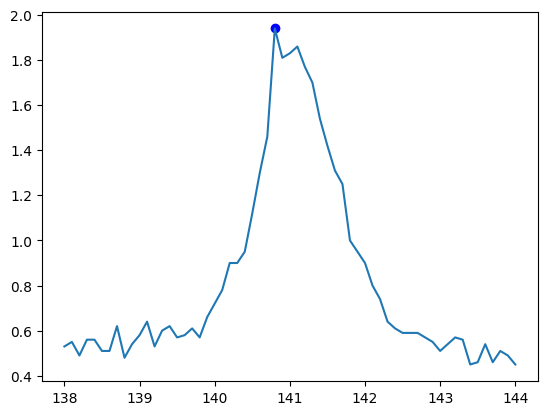

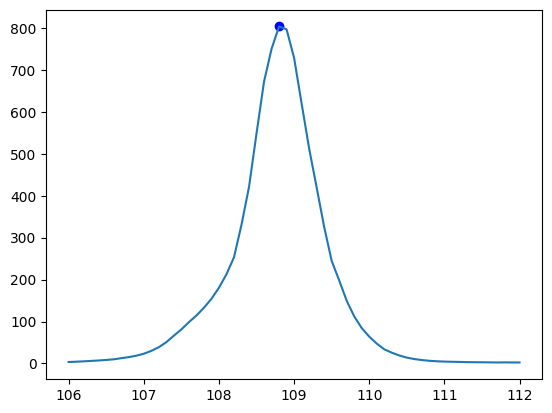

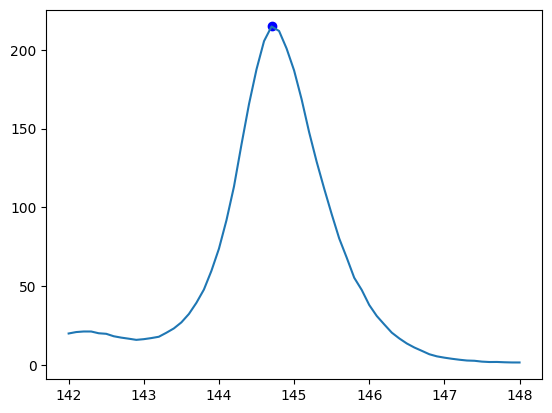

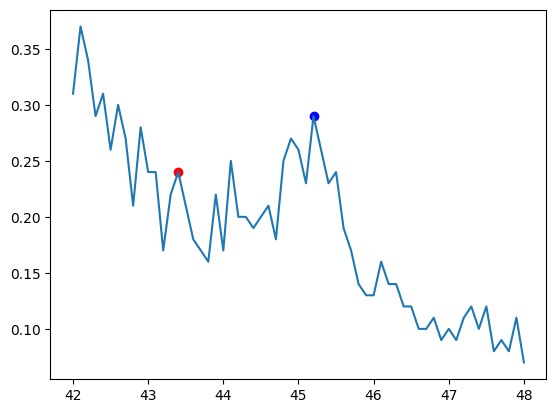

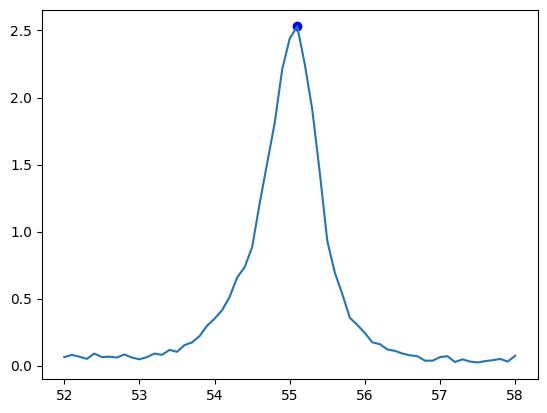

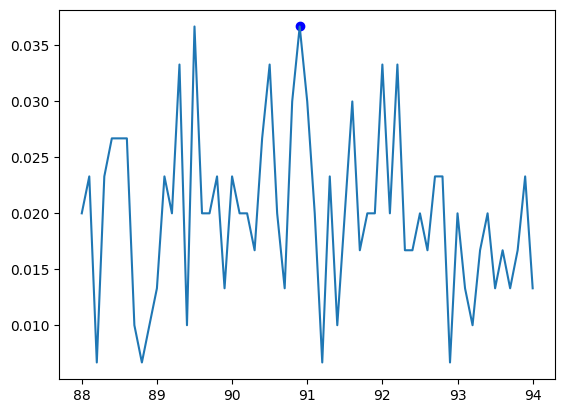

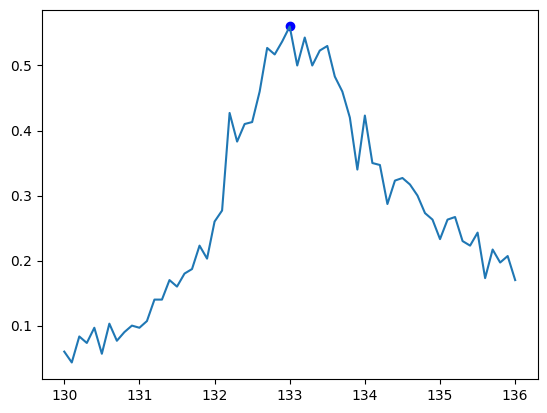

In [395]:
x = picosKa[:, 1].astype(float)
y = picosKa[:, 0].astype(float)
x1 = picosKb[:, 1].astype(float)
y1 = picosKb[:, 0].astype(float)
plt.plot(x, y, marker='o', linestyle='', color='blue')
plt.plot(x1, y1, marker='o', linestyle='', color = 'red')
plt.plot(array,dadosTi)
plt.show()

x = picosKa2[:, 1].astype(float)
y = picosKa2[:, 0].astype(float)
x1 = picosKb2[:, 1].astype(float)
y1 = picosKb2[:, 0].astype(float)
plt.plot(x, y, marker='o', linestyle='', color='blue')
plt.plot(x1, y1, marker='o', linestyle='', color = 'red')
plt.plot(array2,dadosKCaSn)
plt.show()

x_Cl = picosCl_Ka[:, 1].astype(float)
y_Cl = picosCl_Ka[:, 0].astype(float)
plt.plot(x_Cl, y_Cl, marker='o', linestyle='', color='blue', label='picosCl_Ka')
plt.plot(array3,dadosCl)
plt.show()

# Plot para picos S
x_S = picosS_Ka[:, 1].astype(float)
y_S = picosS_Ka[:, 0].astype(float)
plt.plot(x_S, y_S, marker='o', linestyle='', color='blue', label='picosS_Ka')
plt.plot(array4,dadosS)
plt.show()

# Plot para picos P
x_P = picosP_Ka[:, 1].astype(float)
y_P = picosP_Ka[:, 0].astype(float)
plt.plot(x_P, y_P, marker='o', linestyle='', color='blue', label='picosP_Ka')
plt.plot(array5,dadosP)
plt.show()

# Plot para picos Si
x_Si = picosSi_Ka[:, 1].astype(float)
y_Si = picosSi_Ka[:, 0].astype(float)
plt.plot(x_Si, y_Si, marker='o', linestyle='', color='blue', label='picosSi_Ka')
plt.plot(array6,dadosSi)
plt.show()

# Plot para picos Al
x_Al = picosAl_Ka[:, 1].astype(float)
y_Al = picosAl_Ka[:, 0].astype(float)
plt.plot(x_Al, y_Al, marker='o', linestyle='', color='blue', label='picosAl_Ka')
plt.plot(array7,dadosAl)
plt.show()

# Plot para picos Mg
x_Mg = picosMg_Ka[:, 1].astype(float)
y_Mg = picosMg_Ka[:, 0].astype(float)
x1_Mg = picosMg_Kb[:, 1].astype(float)
y1_Mg = picosMg_Kb[:, 0].astype(float)
plt.plot(x_Mg, y_Mg, marker='o', linestyle='', color='blue', label='picosMg_Ka')
plt.plot(x1_Mg, y1_Mg, marker='o', linestyle='', color='red', label='picosMg_Kb')
plt.plot(array8,dadosMg)
plt.show()

# Plot para picos Na
x_Na = picosNa_Ka[:, 1].astype(float)
y_Na = picosNa_Ka[:, 0].astype(float)
plt.plot(x_Na, y_Na, marker='o', linestyle='', color='blue', label='picosNa_Ka')
plt.plot(array9,dadosNa)
plt.show()

# Plot para picos F
x_F = picosF_Ka[:, 1].astype(float)
y_F = picosF_Ka[:, 0].astype(float)
plt.plot(x_F, y_F, marker='o', linestyle='', color='blue', label='picosF_Ka')
plt.plot(array10,dadosF)
plt.show()

x_F = picosO_Ka[:, 1].astype(float)
y_F = picosO_Ka[:, 0].astype(float)
plt.plot(x_F, y_F, marker='o', linestyle='', color='blue', label='picosF_Ka')
plt.plot(array11,dadosO)
plt.show()